In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv(r'SampleSuperstore.csv')

In [5]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#check for the shape of the dataset
df.shape

(9994, 13)

In [7]:
#check the overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [11]:
#let check for any missing value
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

NO missing value

In [13]:
#let check for duplicates
df.duplicated().any()

True

we have duplicates in our dataset, so we will be dropping them

Exploratory Data Analysis

In [15]:
#let drop the duplicates
df.drop_duplicates(inplace = True)

In [17]:
#let recheck for duplicates
df.duplicated().any()

False

In [18]:
# let check for correlation
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


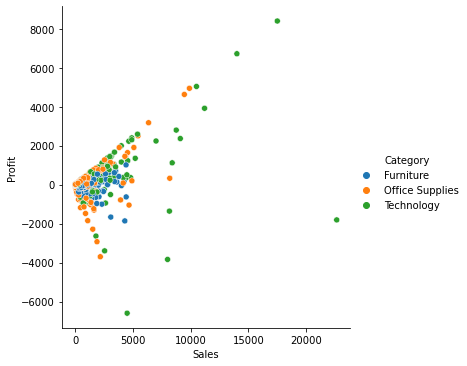

In [23]:
#visualization of the relationship between sales and profit
sns.relplot(data=df,x='Sales',y='Profit', hue = 'Category')

# Summary

Its observed that more profits are gotten from sales of Technology


More work need to be done on Office Supplies because the company it making more loss from it sales

Furniture has less loss but stay at even , so company need to work on it to make profit from it because it already has a market of sales

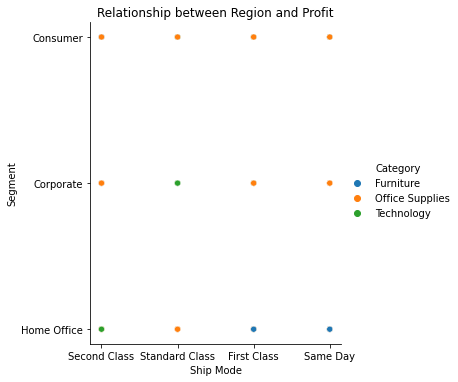

In [37]:
#visualize shipping mode with segment
sns.relplot(data=df,x='Ship Mode',y='Segment', hue = 'Category')
plt.title('Relationship between Region and Profit');

it noted that consumers uses all shop mode to ship office supplies and they are the major customer for office supplies

it is also noted that the type of ship mode used in shipping furniture contributed to it not being profitable , the company need to look into it

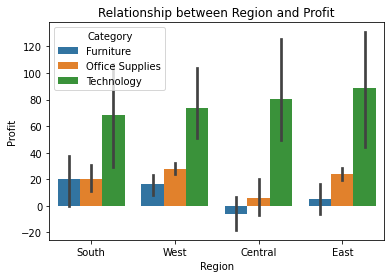

In [38]:
#visualize the relationship of Region and profit
sns.barplot(data=df,x='Region',y='Profit', hue = 'Category')
plt.title('Relationship between Region and Profit');

Central and East region need to be concentrated on how to improve the sales of furniture and office supplies

In [43]:
#State with the highest Sales
TopState= df['State'].value_counts().head()
TopState

California      1996
New York        1127
Texas            983
Pennsylvania     586
Washington       502
Name: State, dtype: int64

<AxesSubplot:>

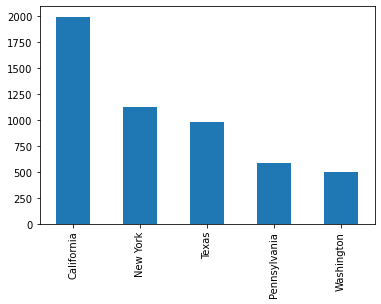

In [44]:
#visualizing the top states
TopState.plot(kind = 'bar')

California has the highest sales

In [53]:
#checking for what is sold by state
Sold_state= df.groupby('Category')['State'].value_counts(ascending=False).head(10)
Sold_state

Category   State       
Furniture  California      444
           New York        236
           Texas           202
           Pennsylvania    125
           Illinois        123
           Washington      113
           Ohio             92
           Florida          85
           Virginia         52
           Colorado         51
Name: State, dtype: int64

<AxesSubplot:xlabel='Category,State'>

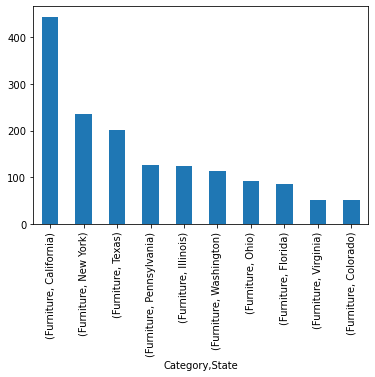

In [54]:
#visualizing sales by top state
Sold_state.plot(kind = 'bar')